In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In the realm of sports analytics, understanding player efficiency is crucial for coaches, teams, and analysts aiming to maximize performance and gain a competitive edge. One key metric that provides insight into a basketball player's scoring efficiency is True Shooting Percentage (TS%). Unlike traditional shooting percentages, TS% accounts for field goals, three-point shots, and free throws, offering a more holistic view of a player’s scoring efficiency. This project aims to develop a data-driven model that predicts a player’s True Shooting Percentage using a range of influential factors, including height, weight, points and usage percentage..

In [3]:
all_seasons_df  = pd.read_csv('all_seasons.csv')
all_seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [4]:
all_seasons_df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [5]:
all_seasons_df.head(10) 

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,NaN,USA,1993,2,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


In [6]:
all_seasons_df.tail(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12834,12834,Jimmy Butler,MIA,33.0,200.66,104.326160,Marquette,USA,2011,1,...,22.9,5.9,5.3,1.2,0.068,0.121,0.248,0.647,0.264,2022-23
12835,12835,Jock Landale,PHX,27.0,210.82,115.665960,St. Mary's,Australia,Undrafted,Undrafted,...,6.6,4.1,1.0,7.9,0.114,0.164,0.182,0.595,0.101,2022-23
12836,12836,Joe Harris,BKN,31.0,198.12,99.790240,Virginia,USA,2014,2,...,7.6,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2022-23
12837,12837,Joe Ingles,MIL,35.0,205.74,99.790240,NaN,Australia,Undrafted,Undrafted,...,6.9,2.8,3.3,2.5,0.012,0.102,0.122,0.616,0.181,2022-23
12838,12838,Joe Wieskamp,TOR,23.0,198.12,92.986360,Iowa,USA,2021,2,...,1.0,0.4,0.3,1.0,0.000,0.068,0.115,0.321,0.083,2022-23
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,12843,JaMychal Green,GSW,33.0,205.74,102.965384,Alabama,USA,Undrafted,Undrafted,...,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


In [7]:
season_counts = pd.Series(all_seasons_df['season']).value_counts()
print(season_counts)

season
2021-22    605
2020-21    540
2017-18    540
2022-23    539
2018-19    530
2019-20    529
2014-15    492
2016-17    486
2013-14    482
2011-12    478
2015-16    476
2012-13    469
2004-05    464
2006-07    458
2005-06    458
2010-11    452
2007-08    451
2008-09    445
2009-10    442
2003-04    442
2000-01    441
1996-97    441
2001-02    440
1997-98    439
1998-99    439
1999-00    438
2002-03    428
Name: count, dtype: int64


In [8]:
team_counts_by_season = all_seasons_df.groupby('season')['team_abbreviation'].value_counts()
print(team_counts_by_season)

season   team_abbreviation
1996-97  TOR                  20
         ATL                  17
         BOS                  17
         DAL                  17
         DEN                  17
                              ..
2022-23  NOP                  16
         NYK                  16
         OKC                  16
         PHX                  16
         HOU                  15
Name: count, Length: 802, dtype: int64


In [9]:
ts_pct_by_season = all_seasons_df.groupby('season')['ts_pct'].mean()
print(ts_pct_by_season)

season
1996-97    0.505206
1997-98    0.496599
1998-99    0.480806
1999-00    0.494678
2000-01    0.488728
2001-02    0.493041
2002-03    0.483479
2003-04    0.487251
2004-05    0.502110
2005-06    0.506205
2006-07    0.510854
2007-08    0.513111
2008-09    0.520861
2009-10    0.522520
2010-11    0.513781
2011-12    0.500220
2012-13    0.504271
2013-14    0.510535
2014-15    0.509970
2015-16    0.524588
2016-17    0.525870
2017-18    0.529011
2018-19    0.530755
2019-20    0.537871
2020-21    0.544180
2021-22    0.523787
2022-23    0.560584
Name: ts_pct, dtype: float64


In [10]:
nba_df = all_seasons_df[['player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'pts', 'net_rating', 'usg_pct', 'ts_pct', 'season']]

In [11]:
pts_df = nba_df.groupby('season')['pts'].mean()
print(pts_df)

season
1996-97    8.026077
1997-98    7.947608
1998-99    7.358542
1999-00    7.985845
2000-01    7.811338
2001-02    7.982727
2002-03    7.849299
2003-04    7.745475
2004-05    8.088147
2005-06    7.982533
2006-07    8.208734
2007-08    8.267184
2008-09    8.503820
2009-10    8.571719
2010-11    8.206195
2011-12    7.928870
2012-13    7.957996
2013-14    8.090249
2014-15    8.122561
2015-16    8.349370
2016-17    8.426749
2017-18    8.160370
2018-19    8.613585
2019-20    8.726465
2020-21    8.942407
2021-22    8.240000
2022-23    9.121336
Name: pts, dtype: float64


In [12]:
nba_df.isna().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
pts                  0
net_rating           0
usg_pct              0
ts_pct               0
season               0
dtype: int64

In [13]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   pts                12844 non-null  float64
 6   net_rating         12844 non-null  float64
 7   usg_pct            12844 non-null  float64
 8   ts_pct             12844 non-null  float64
 9   season             12844 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1003.6+ KB


In [14]:
nba_df.describe()

,age,player_height,player_weight,pts,net_rating,usg_pct,ts_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,8.212582,-2.226339,0.184641,0.513138
std,4.339211,9.111090,12.426628,6.016573,12.665124,0.053545,0.101724
min,18.000000,160.020000,60.327736,0.000000,-250.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,3.600000,-6.400000,0.149000,0.482000
50%,26.000000,200.660000,99.790240,6.700000,-1.300000,0.181000,0.525000
75%,30.000000,208.280000,108.862080,11.500000,3.200000,0.217000,0.563000
max,44.000000,231.140000,163.293120,36.100000,300.000000,1.000000,1.500000


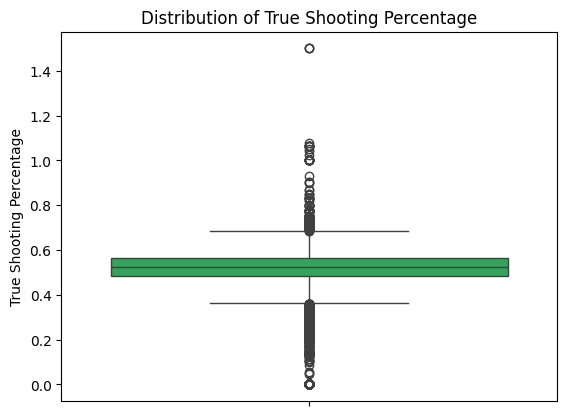

In [15]:
# Create a box plot for true shooting percentage
sns.boxplot(y='ts_pct', data=nba_df, color = '#1DB954')

# Add title and labels
plt.title('Distribution of True Shooting Percentage')
plt.ylabel('True Shooting Percentage')


# Show the plot
plt.show()

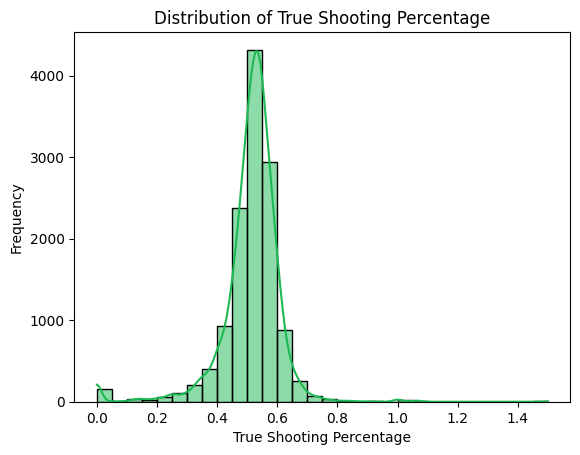

In [16]:
# histogram to plot distribution of true shooting percentage
sns.histplot(nba_df['ts_pct'], bins=30, kde=True, color = '#1DB954')

# Add title and labels
plt.title('Distribution of True Shooting Percentage')
plt.xlabel('True Shooting Percentage')
plt.ylabel('Frequency')

# Show the plot
plt.show()

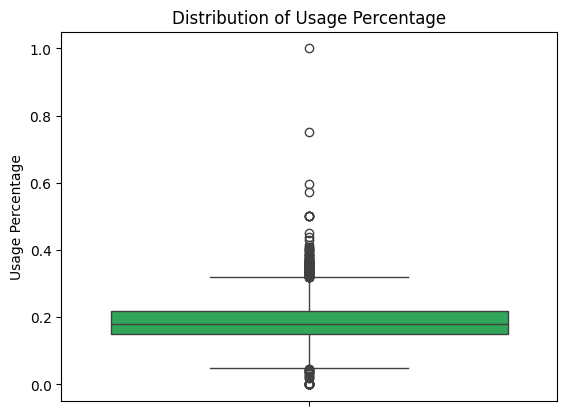

In [17]:
# box plot for usage percentage
sns.boxplot(y='usg_pct', data=nba_df, color = '#1DB954')

# Add title and labels
plt.title('Distribution of Usage Percentage')
plt.ylabel('Usage Percentage')

# Show the plot
plt.show()

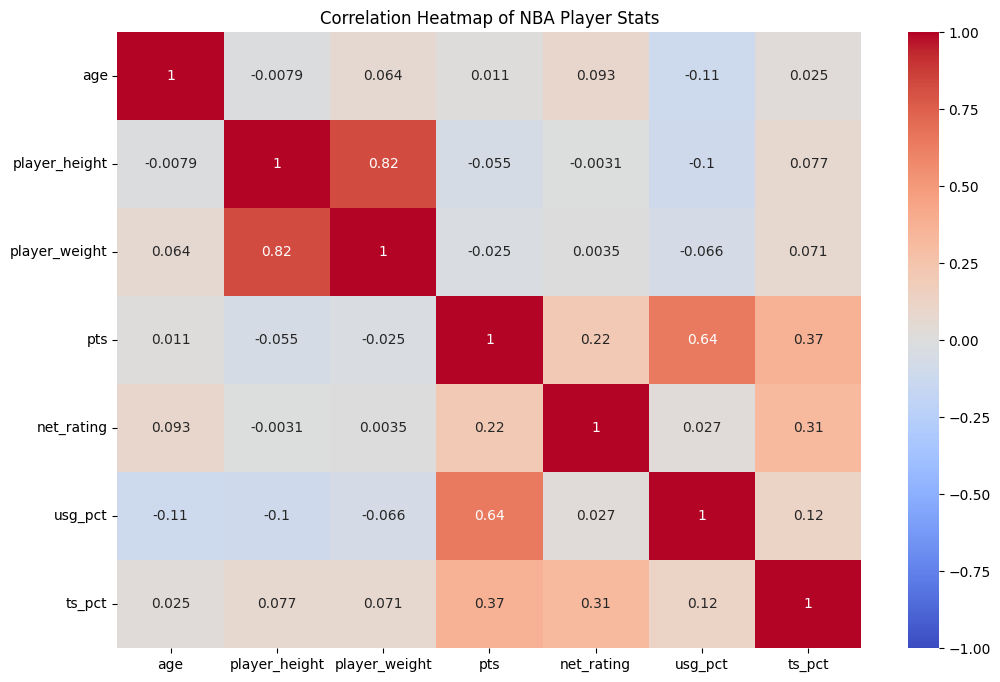

In [18]:
# Correlation Matrix
corr_matrix = nba_df[["age", "player_height", "player_weight", "pts", "net_rating", "usg_pct", "ts_pct"]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of NBA Player Stats")
plt.show()

In [ ]:
#Linear Regression
features = ["age", "player_height", "player_weight", "pts", "net_rating", "usg_pct"]

X = nba_df[features]
y = nba_df['ts_pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Linear Regression:
Mean Absolute Error: 0.055002555328555455
Mean Squared Error: 0.0084407447879322
R-squared: 0.18931744667153494


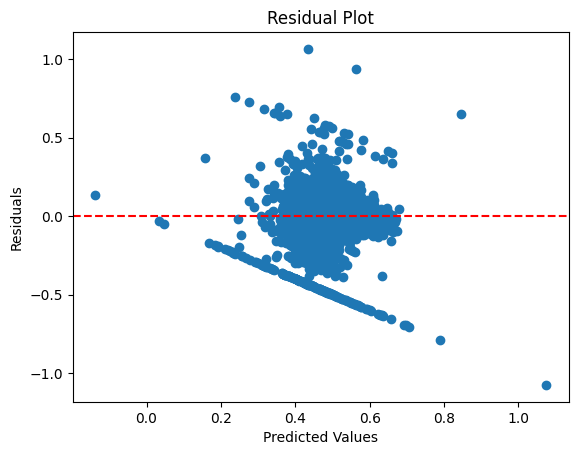

In [28]:
# Plot residuals
y_pred = model.predict(X)
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
features = ["age", "player_height", "player_weight", "pts", "net_rating", "usg_pct"]
X = nba_df[features]
y = nba_df['ts_pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor:")
print("  Mean Absolute Error:", mae)
print("  Mean Squared Error:", mse)
print("  R-squared:", r2)

Gradient Boosting Regressor:
  Mean Absolute Error: 0.04456134865556835
  Mean Squared Error: 0.004508078199693745
  R-squared: 0.5670263184882507


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print("  Mean Absolute Error:", mae)
print("  Mean Squared Error:", mse)
print("  R-squared:", r2)


Random Forest Regressor:
  Mean Absolute Error: 0.04470912417282989
  Mean Squared Error: 0.0046034272730245225
  R-squared: 0.557868615919656
